# Libraries

In [2]:
# General data manipulation
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import sys
import time
from PIL import Image # pip install pillow
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
# Deep learning setup (NN, CNN)
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D, AveragePooling2D

In [4]:
# Model evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Read from .pkl

In [5]:
%%time
er_data = pd.read_pickle('er_data(1-6758).pkl')
nr_data = pd.read_pickle('nr_data(1-6646).pkl')

CPU times: user 1.71 s, sys: 6.31 s, total: 8.02 s
Wall time: 41.7 s


In [6]:
er_data.head(3)

,img_array,type_2_ER,energy
0,"[[104, 104, 101, 101, 101, 101, 97, 104, 96, 1...",1,10
1,"[[98, 97, 103, 104, 104, 98, 99, 102, 101, 97,...",1,3
2,"[[102, 97, 100, 96, 100, 97, 94, 110, 97, 100,...",1,10


In [7]:
nr_data.head(3)

,img_array,type_2_ER,energy
0,"[[96, 103, 98, 100, 100, 100, 108, 96, 99, 100...",0,20
1,"[[96, 104, 104, 98, 98, 100, 97, 103, 100, 100...",0,1
2,"[[101, 98, 106, 99, 99, 97, 97, 100, 102, 104,...",0,6


In [8]:
# n = 2000
# input_df = er_data.iloc[0:n,].append(nr_data.iloc[0:n,])

In [9]:
# full
input_df = er_data.append(nr_data)

## Data Preprocessing
1. reshape for CNN input
2. Centralisation (image cropping)
3. Type conversion (float)
4. Noise reduction 

In [ ]:
img_array = np.array(list(input_df.img_array))
img_array.shape

In [ ]:
# 1. reshape the matrix for CNN input
img_array = img_array.reshape(img_array.shape[0],576,576,1)
img_array.shape

In [ ]:
# 2. centralisation (576-224-224 = 128)
c = 224
img_array = img_array[:,c:576-c,c:576-c,:]
img_array.shape

In [11]:
# 3. type conversion
img_array = img_array.astype(float)

In [12]:
%%time
# 4. noise reduction
from scipy.ndimage import *
img_array = grey_closing(gaussian_gradient_magnitude(img_array,5), 9)

CPU times: user 1min 30s, sys: 2.03 s, total: 1min 32s
Wall time: 1min 33s


In [13]:
# %time
# # Normalization
# # img_array = img_array.astype('float')
# img_array /= 255

In [ ]:
target_data = np.array(input_df.type_2_ER)
target_data = target_data.reshape(len(input_df),1)

In [15]:
# Convert 1-dimensional class arrays to 2-dimensional class matrices
# target_data = np.array(input_df.type_2_ER)
target_data = np_utils.to_categorical(input_df.energy, 6)
# target_data = target_data.reshape(len(input_df),6)

-----------------------------------------------------------------------------

# Train and Test data split

In [16]:
print(img_array.shape)
print(target_data.shape)

(4000, 128, 128, 1)
(4000, 1)


In [17]:
# Train and Test data Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    img_array, target_data, test_size=0.3)

# Model Run

## Part 1. Predicting type of graphs (ER/NR)

In [19]:
# CNN for graphic data
#create model
cnn_type = Sequential()
#add model layers
cnn_type.add(Conv2D(16, kernel_size=9, activation='relu', input_shape=(128,128,1)))
cnn_type.add(MaxPooling2D(pool_size=(2, 2)))
cnn_type.add(Conv2D(32, kernel_size=5, activation='relu'))
# cnn_type.add(Dropout(0.5))
cnn_type.add(MaxPooling2D(pool_size=(2, 2)))
cnn_type.add(Conv2D(64, kernel_size=3, activation='relu'))
cnn_type.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_type.add(Conv2D(128, kernel_size=3, activation='relu'))
cnn_type.add(Flatten())
cnn_type.add(Dense(128, activation='relu'))
cnn_type.add(Dense(1, activation='sigmoid'))
# cnn_type.add(Dense(2, activation='softmax'))


cnn_type.compile(optimizer='adam',
#     loss='categorical_crossentropy',
    loss='binary_crossentropy',
    metrics=['accuracy'])

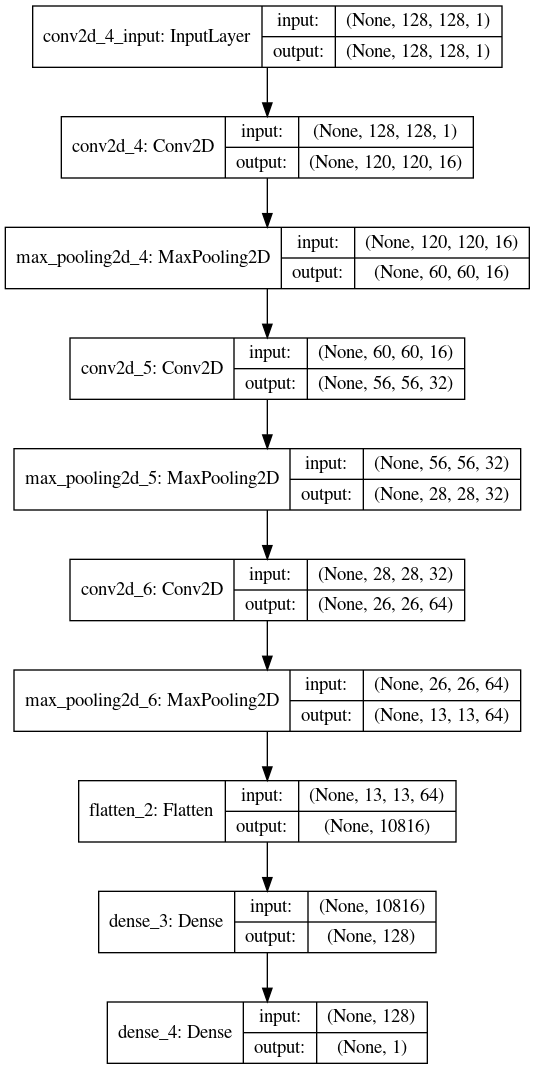

In [20]:
from keras.utils import plot_model
plot_model(cnn_type, show_shapes=True)

In [21]:
%%time 
cnn_type_model = cnn_type.fit(x_train, y_train, 
                              batch_size=64,
                              epochs=10,
                              # verbose=1,
                              validation_data=(x_test, y_test))

Train on 2800 samples, validate on 1200 samples
Epoch 1/10
2800/2800 [==============================] - 91s 33ms/step - loss: 0.1165 - accuracy: 0.9689 - val_loss: 0.0219 - val_accuracy: 0.9983
Epoch 2/10
2800/2800 [==============================] - 94s 33ms/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 0.0095 - val_accuracy: 0.9975
Epoch 3/10
2800/2800 [==============================] - 73s 26ms/step - loss: 0.0043 - accuracy: 0.9996 - val_loss: 0.0095 - val_accuracy: 0.9983
Epoch 4/10
2800/2800 [==============================] - 54s 19ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 5/10
2800/2800 [==============================] - 54s 19ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 6/10
2800/2800 [==============================] - 54s 19ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 7/10
2800/2800 [==============================] - 54s 19ms/step - loss

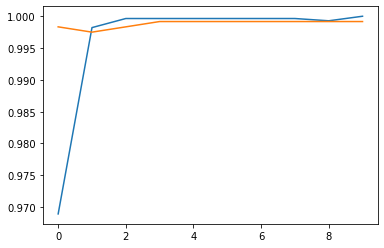

In [31]:
plt.plot(cnn_type_model.history['accuracy'])
plt.plot(cnn_type_model.history['val_accuracy'])

In [25]:
cnn_type.save('CNN_1(Tommy).h5')

In [26]:
score, acc = cnn_type.evaluate(x_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

1200/1200 [==============================] - 6s 5ms/step
Test score: 0.014411957420285
Test accuracy: 0.9991666674613953


# Test data

In [27]:
# Prediction on testing data
y_pred = np.round(cnn_type.predict(x_test))

In [28]:
# Generate the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00       617

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



### Confusion Matrix

In [29]:
cm = confusion_matrix(y_test,y_pred) # create a confusion matrix

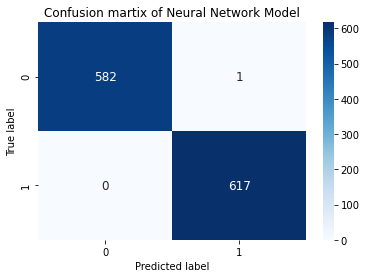

In [30]:
# Plot the confusion matrix
import seaborn as sns
sns.heatmap(cm,
            cmap=plt.cm.Blues,
            annot=True, 
            annot_kws={"size": 12}, 
            fmt="d") # font size
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion martix of Neural Network Model')
plt.show()

# Part 2: Predicting Energy level based on type of graphs

## 1. ER

In [10]:
# full
input_df = er_data.append(nr_data)

In [11]:
input_df_er = input_df[input_df.type_2_ER == 1]
input_df_er.head()

,img_array,type_2_ER,energy
0,"[[104, 104, 101, 101, 101, 101, 97, 104, 96, 1...",1,10
1,"[[98, 97, 103, 104, 104, 98, 99, 102, 101, 97,...",1,3
2,"[[102, 97, 100, 96, 100, 97, 94, 110, 97, 100,...",1,10
3,"[[101, 96, 100, 99, 96, 108, 104, 102, 101, 99...",1,30
4,"[[97, 98, 100, 101, 98, 100, 102, 100, 99, 99,...",1,10


In [12]:
no_of_energy_er = len(set(input_df_er.energy))

In [15]:
set(input_df_er.energy)

{'1', '10', '20', '3', '30', '6'}

In [13]:
img_array = np.array(list(input_df_er.img_array))
img_array.shape

(6758, 576, 576)

In [14]:
# 1. reshape the matrix for CNN input
img_array = img_array.reshape(img_array.shape[0],576,576,1)
img_array.shape

(6758, 576, 576, 1)